# Varying advection with varying diffusion 

### Neumann boundary conditions

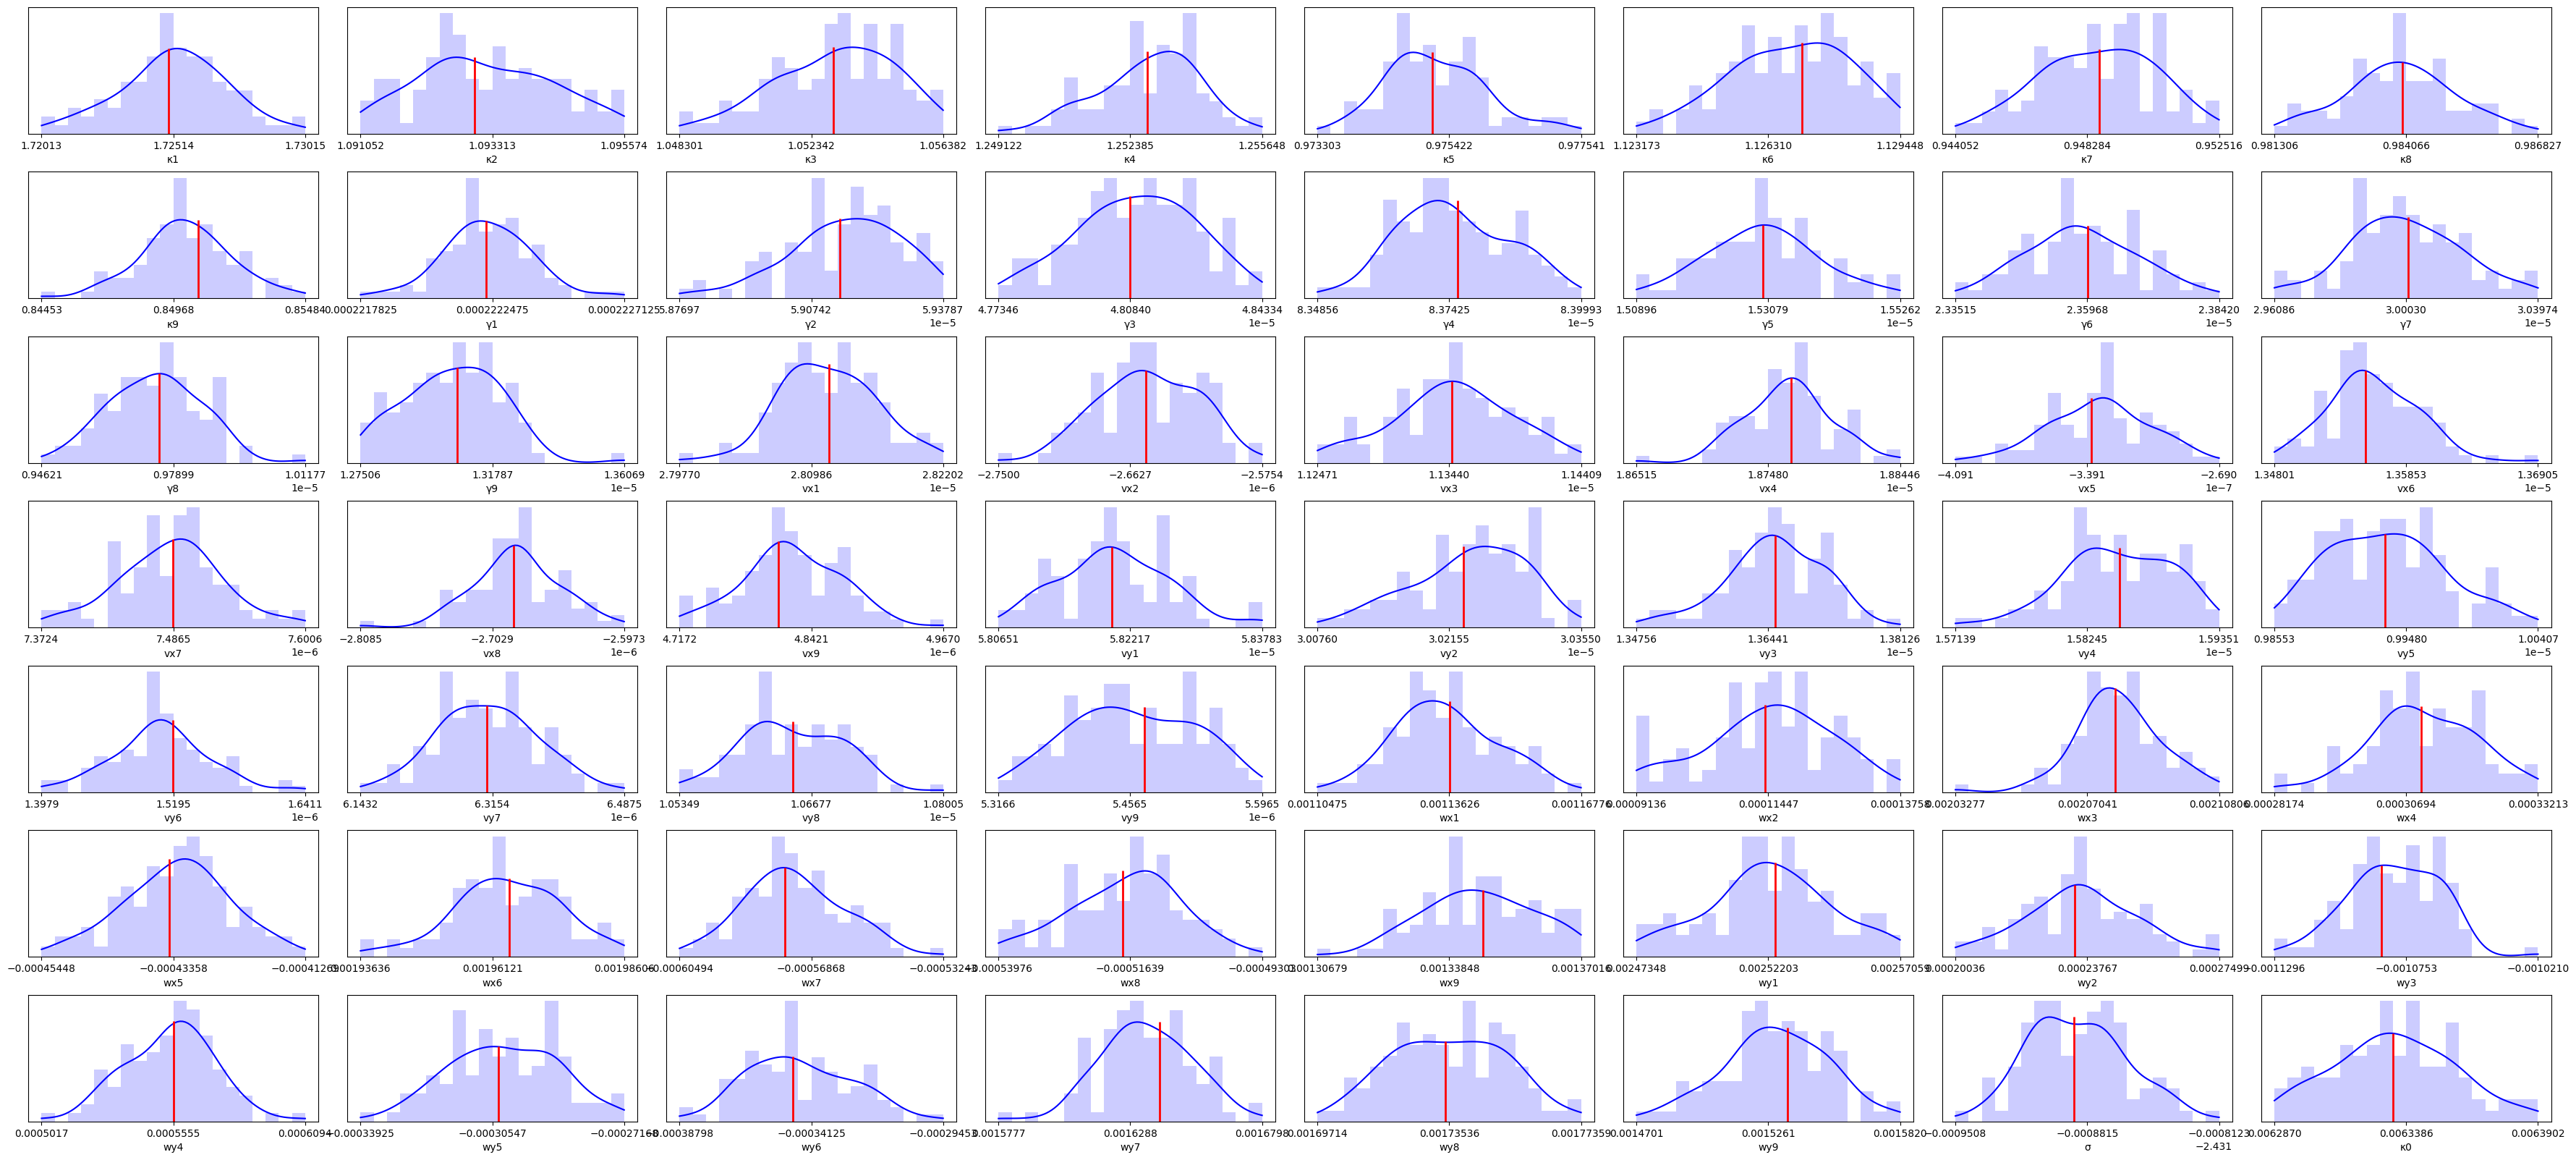

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
grad_res = np.load('../grad/var-advection-var-diffusion-2D-bc1.npz')
ngrad = grad_res['ngrad']
sgrad = grad_res['sgrad']

m = 8
n = 7
fig, ax = plt.subplots(figsize = (45,20),ncols = m, nrows = n)
titles = np.hstack([["\u03BA%d"%i for i in range(1,10)], 
                    ["\u03B3%d"%i for i in range(1,10)], 
                    ["vx%d"%i for i in range(1,10)],
                    ["vy%d"%i for i in range(1,10)],
                    ["wx%d"%i for i in range(1,10)],
                    ["wy%d"%i for i in range(1,10)],
                    "\u03C3", "\u03BA0", "\u03B30", "vx0", "vy0", "\u03C4"])
for i in range(m):
    for j in range(n):
        if i + j*m >= sgrad.shape[0]:
            break
        tx = np.linspace(sgrad[i + j*m,:].min(),sgrad[i+j*m,:].max(),100)
        ty = gaussian_kde(sgrad[i + j*m,:])(tx)
        ax[j,i].plot(tx,ty,'b')
        ax[j,i].hist(sgrad[i + j*m,:],density = True, bins = 20, color = 'b', alpha = 0.2)
        ax[j,i].vlines(x=ngrad[i + j*m],ymin = 0,ymax = ty.max(),colors='r',linewidth = 2)
        ax[j,i].set_xlabel(titles[i + j*m],fontsize = 10)
        ax[j,i].set_yticks([])
        ax[j,i].set_xticks(np.linspace(tx.min(),tx.max(),3))
fig.subplots_adjust(wspace = 0.1, hspace = 0.3)

### Dirichlet boundary conditions

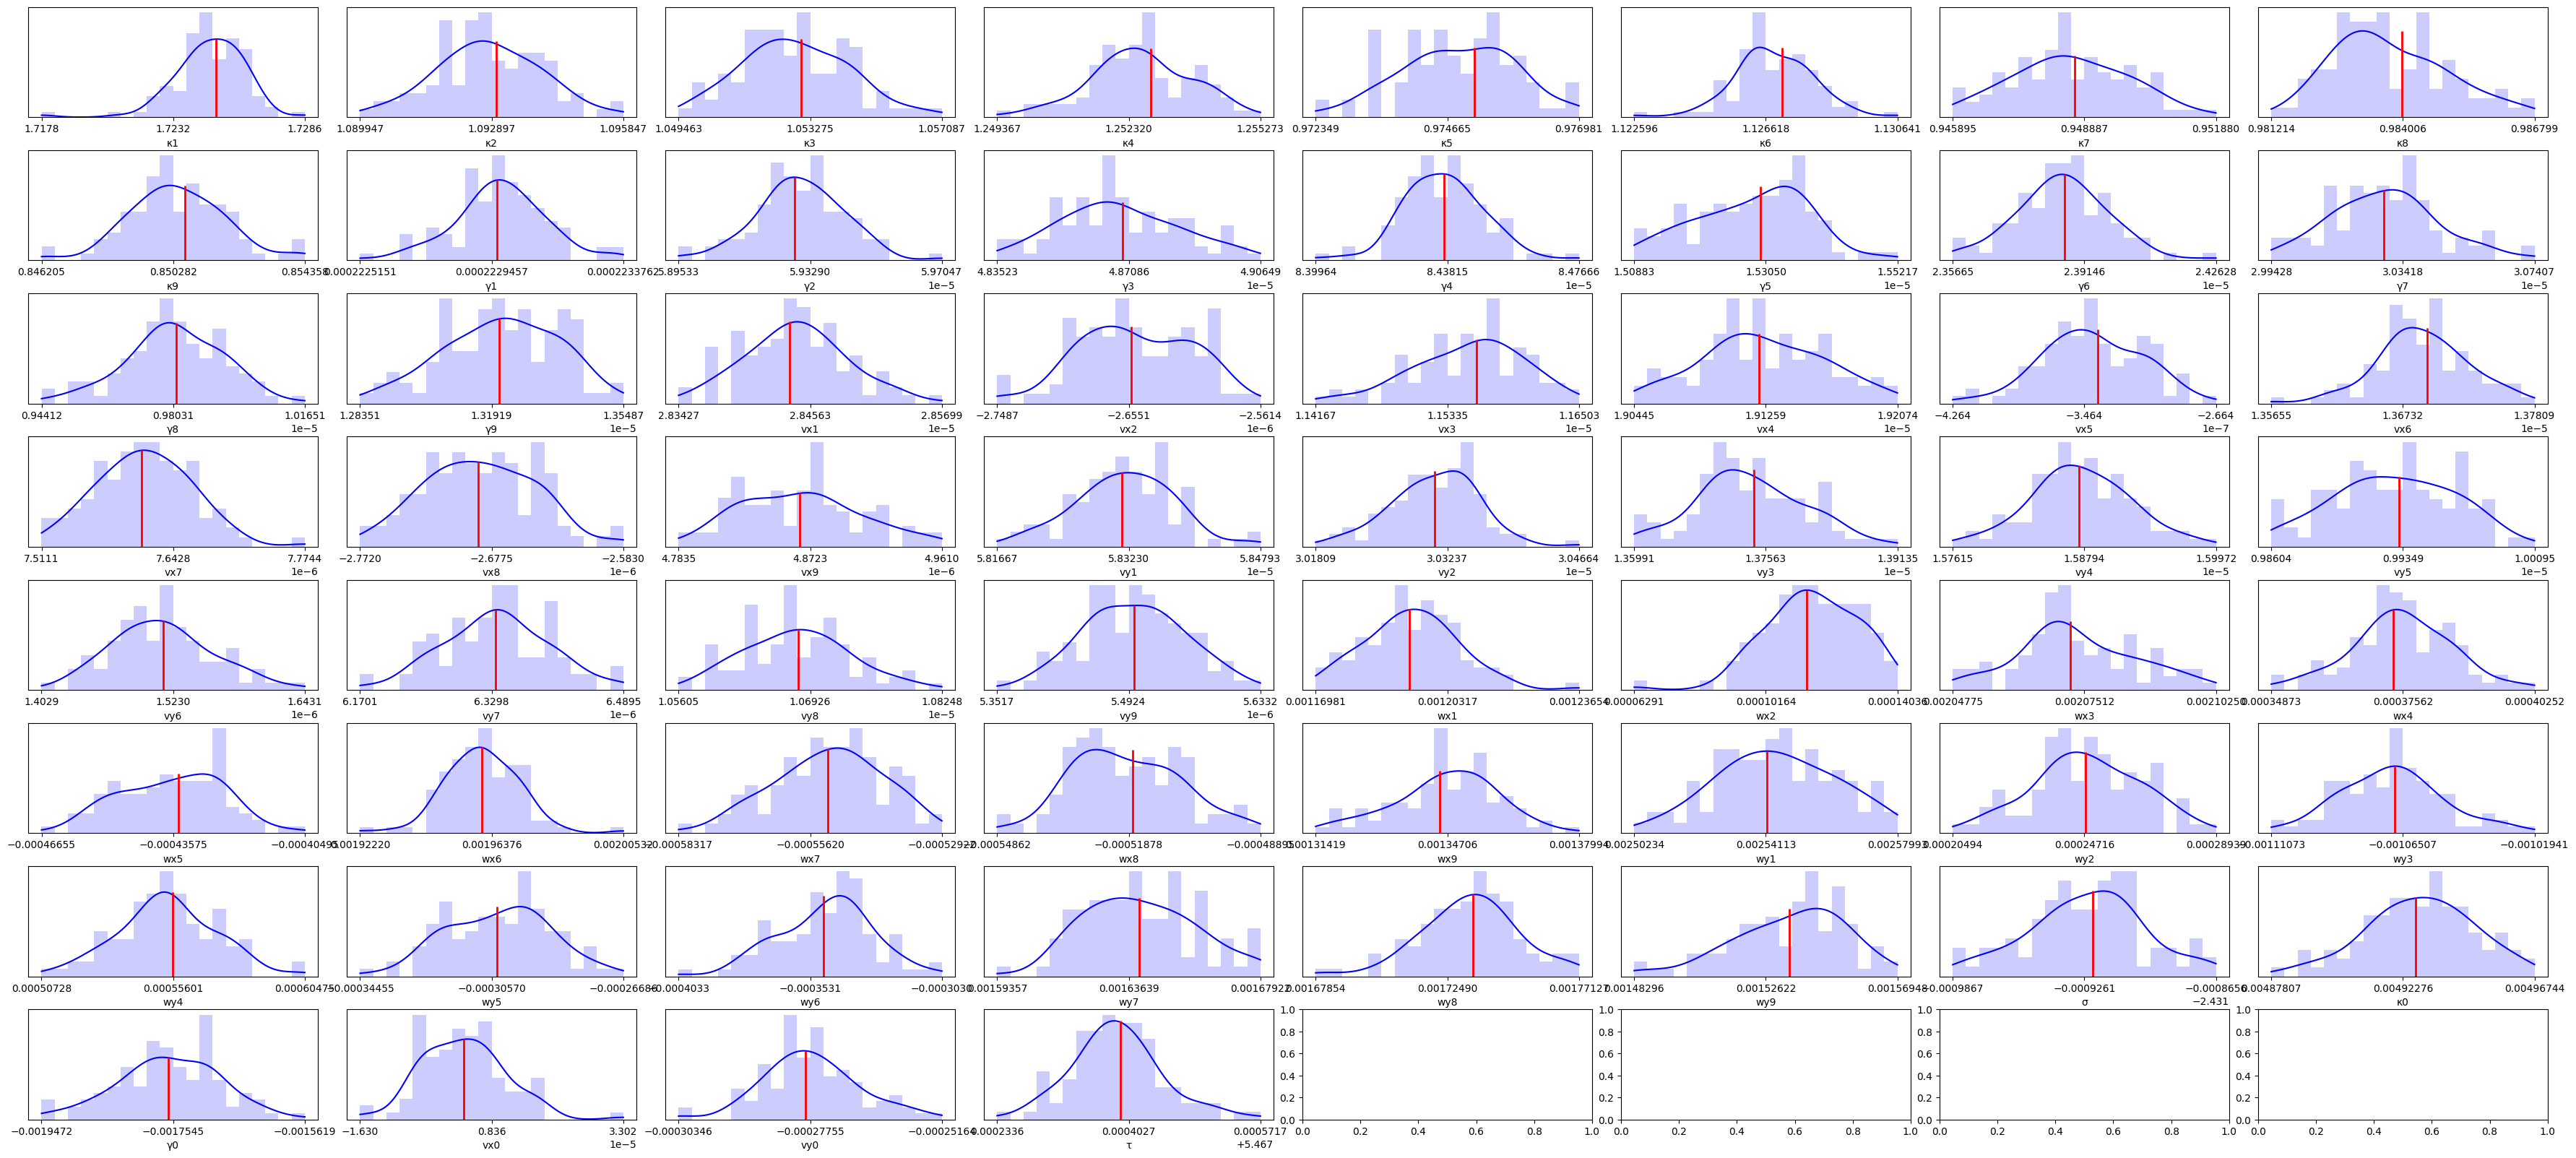

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
grad_res = np.load('../grad/var-advection-var-diffusion-2D-bc3.npz')
ngrad = grad_res['ngrad']
sgrad = grad_res['sgrad']

m = 8
n = 8
fig, ax = plt.subplots(figsize = (45,20),ncols = m, nrows = n)
titles = np.hstack([["\u03BA%d"%i for i in range(1,10)], 
                    ["\u03B3%d"%i for i in range(1,10)], 
                    ["vx%d"%i for i in range(1,10)],
                    ["vy%d"%i for i in range(1,10)],
                    ["wx%d"%i for i in range(1,10)],
                    ["wy%d"%i for i in range(1,10)], "\u03C3", "\u03BA0", "\u03B30", "vx0" ,"vy0","\u03C4"])
for i in range(m):
    for j in range(n):
        if i + j*m >= sgrad.shape[0]:
            break
        tx = np.linspace(sgrad[i + j*m,:].min(),sgrad[i+j*m,:].max(),100)
        ty = gaussian_kde(sgrad[i + j*m,:])(tx)
        ax[j,i].plot(tx,ty,'b')
        ax[j,i].hist(sgrad[i + j*m,:],density = True, bins = 20, color = 'b', alpha = 0.2)
        ax[j,i].vlines(x=ngrad[i + j*m],ymin = 0,ymax = ty.max(),colors='r',linewidth = 2)
        ax[j,i].set_xlabel(titles[i + j*m],fontsize = 10)
        ax[j,i].set_yticks([])
        ax[j,i].set_xticks(np.linspace(tx.min(),tx.max(),3))
fig.subplots_adjust(wspace = 0.1, hspace = 0.3)

#### Visualization

In [11]:
import spdepy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from tqdm import tqdm    

data = sp.datasets.get_sinmod_training()
bc = 1
spde = 'var-advection-var-diffusion'
mod0 = sp.model(grid = sp.grid(x=data['x'], y=data['y'], extend = 5),
        spde = 'whittle-matern', parameters = np.load('../fits/whittle_matern_ani_bc%d.npy'%bc),
        ha = False, bc = bc, anisotropic = True)
mod = sp.model(grid = sp.grid(x=data['x'], y=data['y'], t = data['t'],extend = 5),
        spde = spde, ha = False, bc = bc, anisotropic = True, Q0 = mod0.mod.Q,
        parameters = np.load('../fits/var_advection_var_diffusion_ani_bc%d.npy'%(bc)))
mod.setModel(mu = data['muB'], sigmas = np.log(np.load("../fits/sinmod/sigmas.npy")),useCov = False)

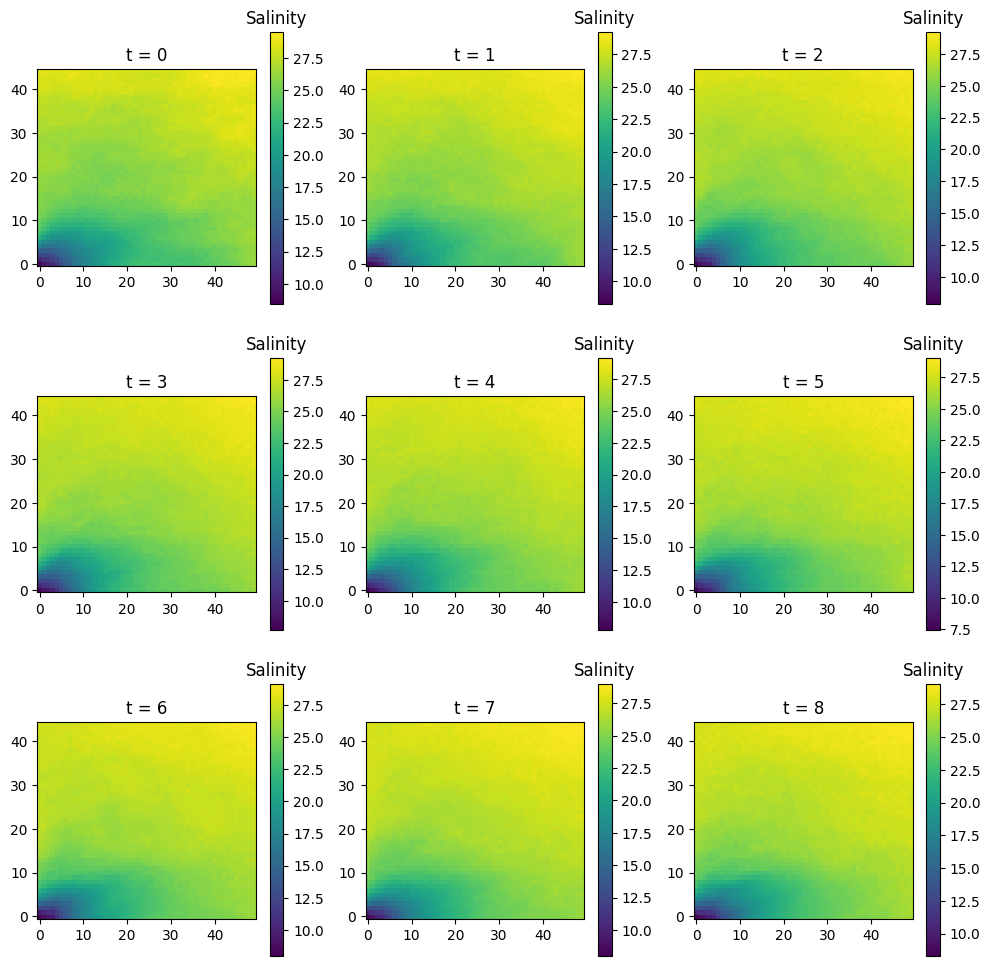

In [12]:
tmp = mod.sample().reshape(mod.grid.T,mod.grid.N,mod.grid.M)
im = list()
clb = list()
fig,ax = plt.subplots(ncols = 3, nrows = 3, figsize = (12,12))
for i in range(3):
    for j in range(3):
        im.append(ax[i,j].imshow(tmp[i*3 + j,:,:],origin = 'lower'))
        clb.append(fig.colorbar(im[i*3+j],ax = ax[i,j]))
        clb[i*3 + j].ax.set_title('Salinity')
        ax[i,j].set_title('t = %d'%(i*3+j))
#fig.tight_layout()

### Prediction on validation set

In [13]:
import spdepy as sp
import numpy as np
from scipy import sparse
from tqdm import tqdm
import matplotlib.pyplot as plt

inMod = sp.datasets.get_sinmod_training()
data = sp.datasets.get_sinmod_validation()
bc = 1
spde = 'var-advection-var-diffusion'
mod0 = sp.model(grid = sp.grid(x=inMod['x'], y=inMod['y'], extend = 5),
        spde = 'whittle-matern', parameters = np.load('../fits/whittle_matern_ani_bc%d.npy'%bc),
        ha = False, bc = bc, anisotropic = True)
mod = sp.model(grid = sp.grid(x=inMod['x'], y=inMod['y'], t = inMod['t'],extend = 5),
        spde = spde, ha = False, bc = bc, anisotropic = True, Q0 = mod0.mod.Q,
        parameters = np.load('../fits/var_advection_var_diffusion_ani_bc%d.npy'%(bc)))
mod.setQ()
mod.setModel(mu = inMod['muB'], sigmas = np.log(np.load("../fits/sinmod/sigmas.npy")),useCov = True)


### Evaluation of temporal prediction accuracy
---
- update all spatial points within a timestep and prediced on rest
- can make a curve for error in specific steps 

In [14]:
obs = data['data']
res = np.zeros((obs.shape[0],obs.shape[1],10))
for i in tqdm(range(obs.shape[1])):
    for j in range(10):
        mod.setModel(mu = inMod['muB'], sigmas = np.log(np.load("../fits/sinmod/sigmas.npy")),useCov = True)
        uidx = np.array([mod.grid.getIdx([x,y,j],extend = False) for x in range(mod.grid.M) for y in range(mod.grid.N)])
        pidx = np.array([mod.grid.getIdx([x,y,t],extend = False) for x in range(mod.grid.M) for y in range(mod.grid.N) for t in (np.delete(np.arange(10),j))])
        mod.update(y = obs[uidx,i],idx = uidx)
        res[:,i,j] = mod.grid.getS()@mod.mu

  0%|          | 0/72 [00:00<?, ?it/s]

100%|██████████| 72/72 [14:57<00:00, 12.47s/it]


In [18]:
res1 = np.zeros([10,72,10])
for j in range(10):
    uidx = np.array([mod.grid.getIdx([x,y,j],extend = False) for x in range(mod.grid.M) for y in range(mod.grid.N)])
    res1[j,:,:] = ((res[uidx,:,:] - obs[uidx,:][:,:,np.newaxis])**2).mean(axis = 0)

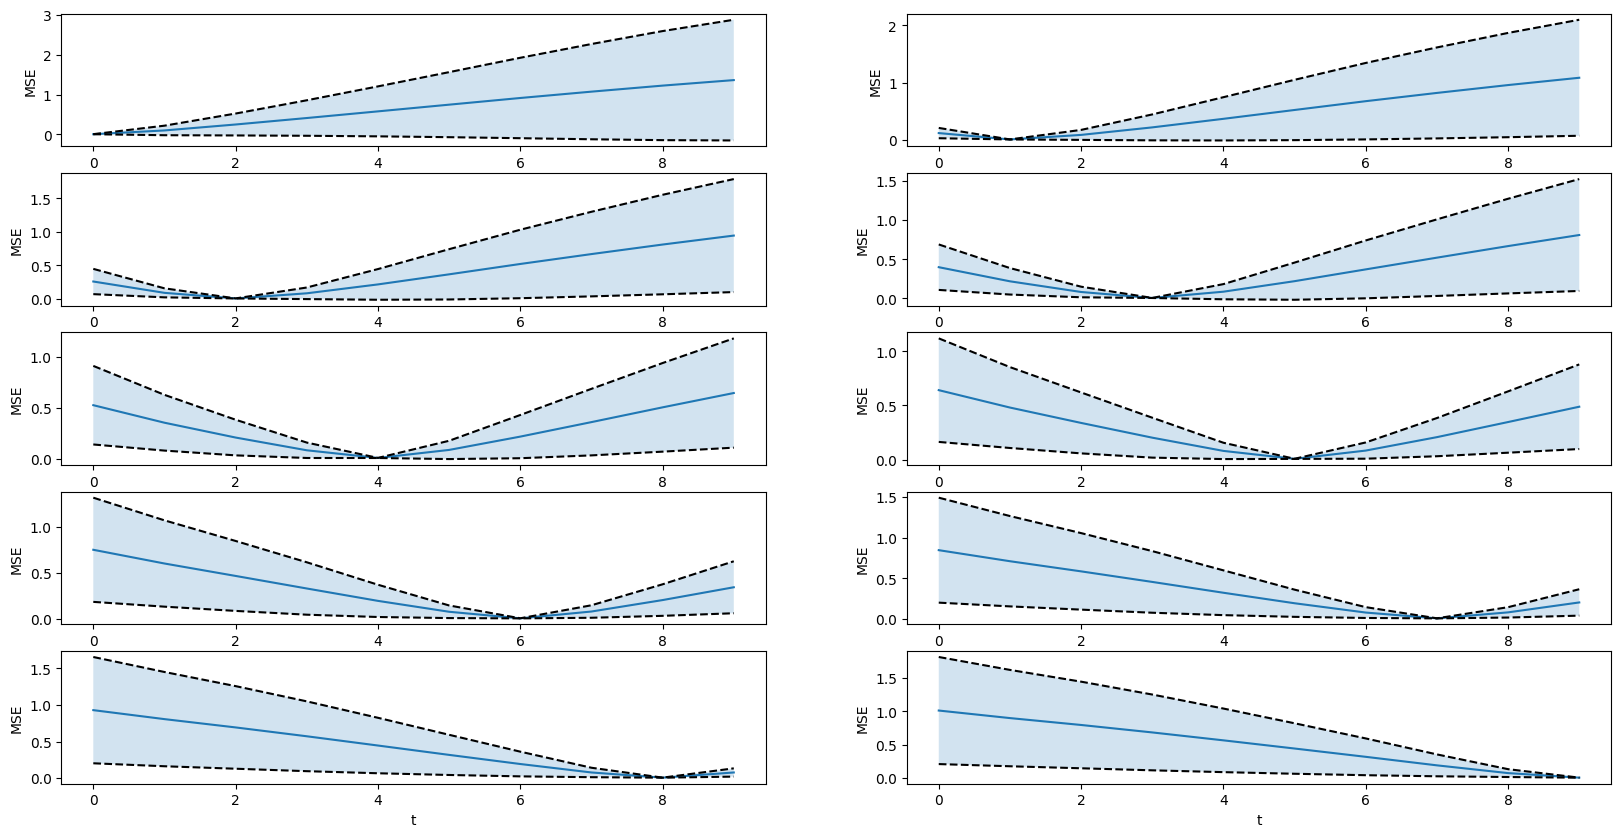

In [33]:
fig,ax = plt.subplots(figsize = (20,10),ncols=2,nrows=5)
for t in range(10):
    ax[t//2,t%2].plot(np.arange(10,dtype = "int32"),res1[:,:,t].mean(axis=1),'-')
    ax[t//2,t%2].fill_between(np.arange(10,dtype = "int32"),res1[:,:,t].mean(axis=1) - res1[:,:,t].std(axis=1),res1[:,:,t].mean(axis=1) + res1[:,:,t].std(axis=1),alpha = 0.2)
    ax[t//2,t%2].plot(np.arange(10,dtype = "int32"),res1[:,:,t].mean(axis=1) - res1[:,:,t].std(axis=1),'--',color = 'black')
    ax[t//2,t%2].plot(np.arange(10,dtype = "int32"),res1[:,:,t].mean(axis=1) + res1[:,:,t].std(axis=1),'--',color = 'black')
    ax[t//2,t%2].set_ylabel('MSE')
    ax[t//2,t%2].set_xlabel('t')

### Evaluation of spatial prediction accuracy
---
- update spatial blocks for all timestep and prediced on rest
- can make a curve for error for each block (heatmap?, err vs range?)

In [49]:
tmp1 = np.linspace(0,mod.grid.M,4).astype("int32")
tmp2 = np.linspace(0,mod.grid.N,4).astype("int32")
obs = data['data']
resS = np.zeros((obs.shape[0],obs.shape[1],9))
for k in tqdm(range(obs.shape[1])):
    for i in range(3): 
        for j in range(3):
            mod.setModel(mu = inMod['muB'], sigmas = np.log(np.load("../fits/sinmod/sigmas.npy")),useCov = True)
            uidx = np.array([mod.grid.getIdx([x,y,t],extend = False) for x in np.arange(tmp1[i],tmp1[i+1]) for y in np.arange(tmp2[j],tmp2[j+1]) for t in np.arange(10)])
            pidx = np.array([mod.grid.getIdx([x,y,t],extend = False) for x in np.delete(np.arange(mod.grid.M),np.arange(tmp1[i],tmp1[i+1])) for y in np.delete(np.arange(mod.grid.N),np.arange(tmp2[j],tmp2[j+1])) for t in np.arange(10)])
            mod.update(y = obs[uidx,k],idx = uidx)
            resS[:,k,i*3+j] = mod.grid.getS()@mod.mu

  0%|          | 0/72 [00:00<?, ?it/s]

100%|██████████| 72/72 [37:50<00:00, 31.54s/it]


In [50]:
resS1 = ((resS - obs[:,:,np.newaxis])**2).mean(axis = 1).reshape(mod.grid.T,mod.grid.N,mod.grid.M,9).mean(axis = 0)

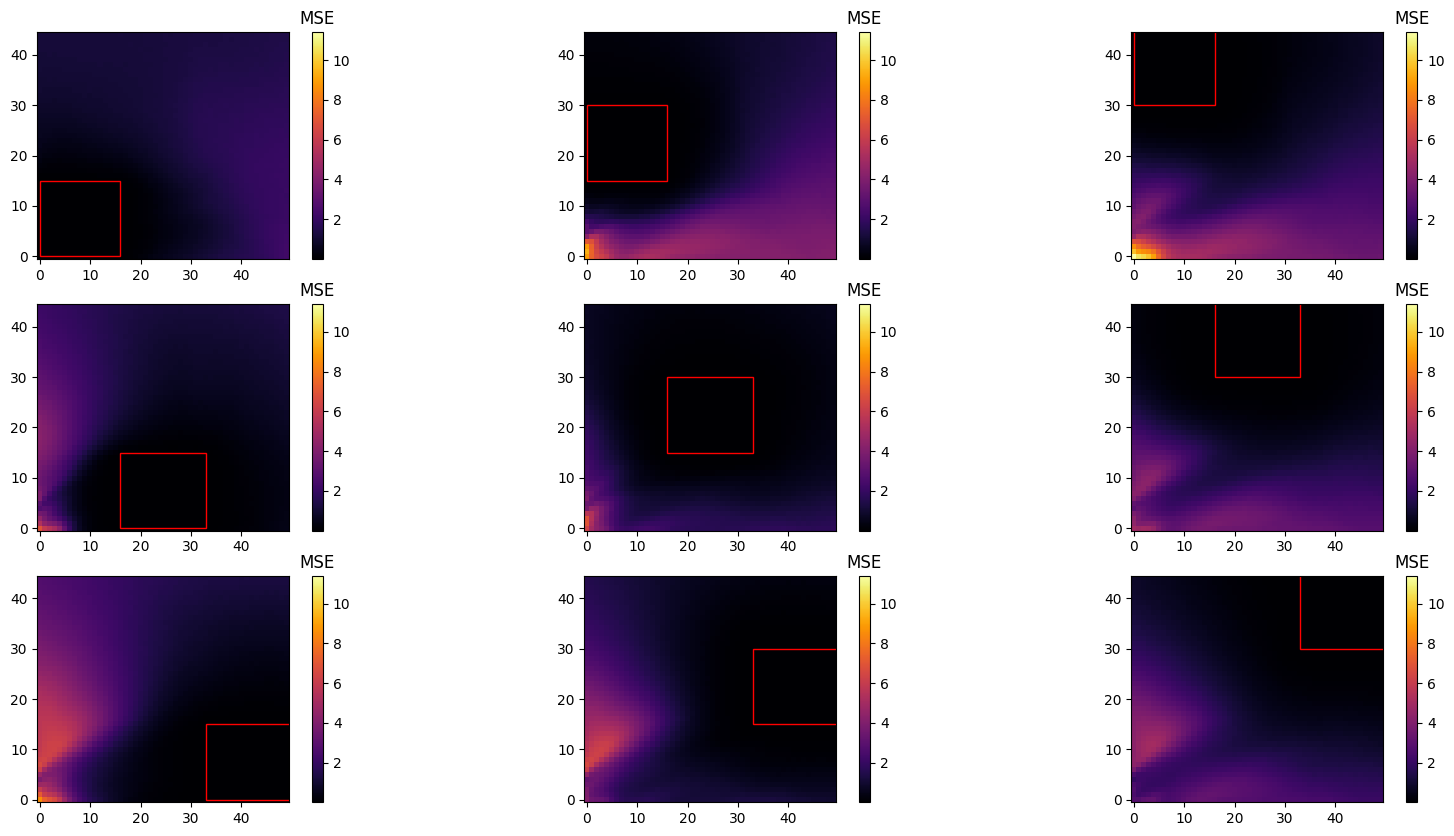

In [53]:
cmin = resS1.min()
cmax = resS1.max()
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize = (20,10),ncols=3,nrows=3)
im = list()
clb = list()
for t in range(9):
    im.append(ax[t//3,t%3].imshow(resS1[:,:,t],origin = 'lower',vmin = cmin, vmax = cmax,cmap = 'inferno'))
    clb.append(fig.colorbar(im[t],ax = ax[t//3,t%3]))
    clb[t].ax.set_title('MSE')
    rect = patches.Rectangle((tmp1[t//3],tmp2[t%3]),tmp1[t//3+1]-tmp1[t//3],tmp2[t%3+1]-tmp2[t%3],linewidth=1,edgecolor='r',facecolor='none')
    ax[t//3,t%3].add_patch(rect)
    
    

#### Prediction on test set

In [1]:
import spdepy as sp
import numpy as np
from scipy import sparse
from tqdm import tqdm
import matplotlib.pyplot as plt

dataTe = sp.datasets.get_sinmod_test()
dataTr = sp.datasets.get_sinmod_training()
bc = 1
spde = 'var-advection-var-diffusion'
mod0 = sp.model(grid = sp.grid(x=dataTr['x'], y=dataTr['y'], extend = 5),
        spde = 'whittle-matern', parameters = np.load('../fits/whittle_matern_ani_bc%d.npy'%bc),
        ha = False, bc = bc, anisotropic = True)
mod = sp.model(grid = sp.grid(x=dataTr['x'], y=dataTr['y'], t = dataTr['t'],extend = 5),
        spde = spde, ha = False, bc = bc, anisotropic = True, Q0 = mod0.mod.Q,
        parameters = np.load('../fits/var_advection_var_diffusion_ani_bc%d.npy'%(bc)))
mod.setQ()
#mod.setModel(mu = dataTr['muB'], sigmas = np.log(np.load("../fits/sinmod/sigmas.npy")),useCov = True)


In [2]:
tmp = mod.getPars()
print(tmp[:9].mean())
print(tmp[9:18].mean())
print(tmp[18:27].mean())
print(tmp[27:36].mean())
print(tmp[36:45].mean())
print(tmp[45:54].mean())
print(tmp[54])
print(tmp[55])

-4.944158833498673
7.4413535316715995
125.9753162140433
-1.9339478973233655
99.26234407724708
61.1055866687101
-1.7429990690792934
4.735820914674784


28.3167798238202


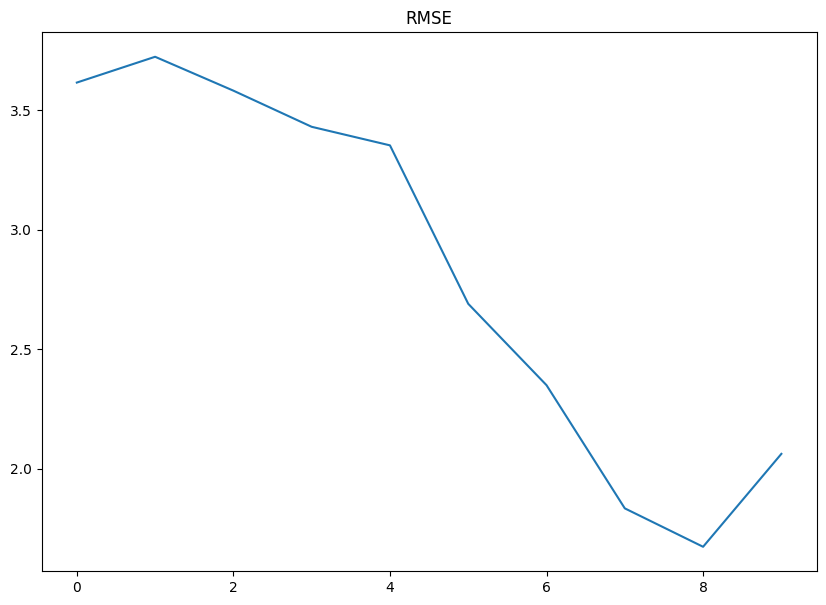

In [3]:
mod.setModel(mu = dataTr['muB'], sigmas = np.log(np.load("../fits/sinmod/sigmas.npy")),useCov = False)
res = np.zeros(10)
start = dataTe['data']['tidx'].min()
tidx = dataTe['data']['tidx'].values
data = dataTe['data']['data'].values
sds = dataTe['data']['var'].values
tau = (1/sds.mean())
idx = dataTe['data']['idx'].values

res[0] = np.sqrt(np.mean((mod.grid.getS(idxs = idx)@mod.mu - data)**2))
for k in range(9):
    rm = tidx == (start+k)
    idxs = idx[rm] + mod.grid.N*mod.grid.M*(k)
    mod.update(y = data[rm], idx = idxs,tau = tau)
    rmF = np.stack([tidx == (start+t) for t in range(k+1,10)],axis= 1)
    idxsF = np.hstack([idx[rmF[:,t-k-1]] + mod.grid.N*mod.grid.M*(t) for t in range(k+1,10)])
    res[k+1] = np.sqrt(np.mean((mod.grid.getS(idxs = idxsF)@mod.mu - np.hstack([data[rmF[:,t-k-1]] for t in range(k+1,10)]))**2))

fig,ax = plt.subplots(figsize = (10,7))
ax.plot(np.arange(10,dtype = "int32"),res,'-')
ax.set_title('RMSE')
print(res.sum())


35.81446194204622


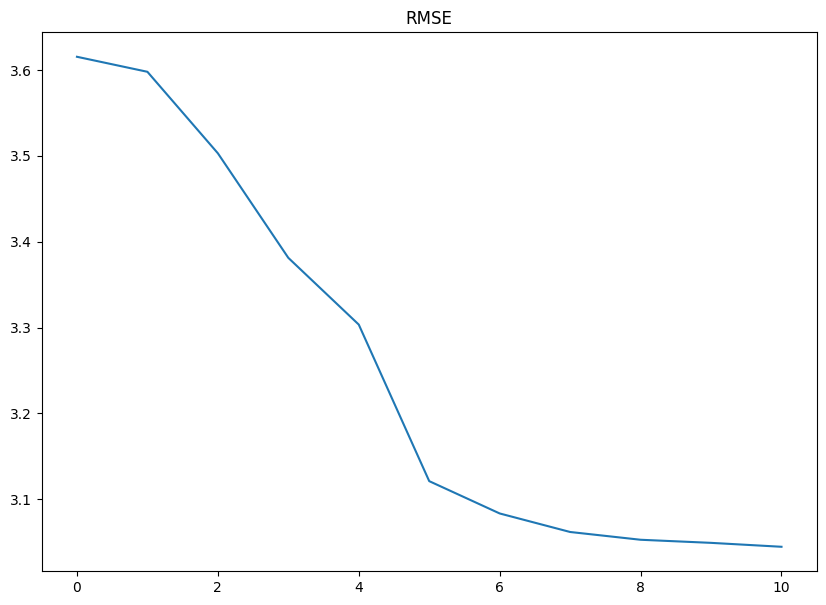

In [4]:
mod.setModel(mu = dataTr['muB'], sigmas = np.log(np.load("../fits/sinmod/sigmas.npy")),useCov = False)
res = np.zeros(11)
start = dataTe['data']['tidx'].min()
tidx = dataTe['data']['tidx'].values
data = dataTe['data']['data'].values
sds = dataTe['data']['var'].values
tau = (1/sds.mean())
idx = dataTe['data']['idx'].values
res[0] = np.sqrt(np.mean((mod.grid.getS(idxs = idx)@mod.mu - data)**2))
for k in range(10):
    rm = tidx == (start+k)
    idxs = idx[rm] + mod.grid.N*mod.grid.M*(k)
    mod.update(y = data[rm], idx = idxs,tau = tau)
    res[k+1] = np.sqrt(np.mean((mod.grid.getS(idxs = idx)@mod.mu - data)**2))

fig,ax = plt.subplots(figsize = (10,7))
ax.plot(np.arange(11,dtype = "int32"),res,'-')
ax.set_title('RMSE')
print(res.sum())

29.62413231972554


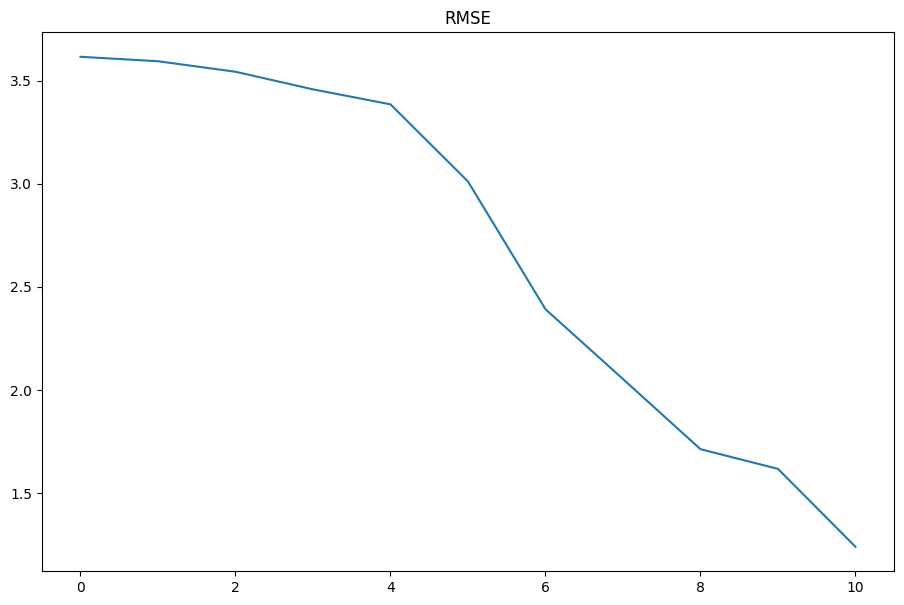

In [5]:
mod.setModel(mu = dataTr['muB'], sigmas = np.log(np.load("../fits/sinmod/sigmas.npy")),useCov = False)
res = np.zeros(11)
start = dataTe['data']['tidx'].min()
tidx = dataTe['data']['tidx'].values
data = dataTe['data']['data'].values
sds = dataTe['data']['var'].values
tau = (1/sds.mean())
idx = dataTe['data']['idx'].values

res[0] = np.sqrt(np.mean((mod.grid.getS(idxs = idx)@mod.mu - data)**2))
for k in range(10):
    rm = tidx == (start+k)
    idxs = idx[rm] + mod.grid.N*mod.grid.M*(k)
    mod.update(y = data[rm], idx = idxs,tau = tau)
    rmF = np.stack([tidx == (start+t) for t in range(k,10)],axis= 1)
    idxsF = np.hstack([idx[rmF[:,t-k]] + mod.grid.N*mod.grid.M*(t) for t in range(k,10)])
    res[k+1] = np.sqrt(np.mean((mod.grid.getS(idxs = idxsF)@mod.mu - np.hstack([data[rmF[:,t-k]] for t in range(k,10)]))**2))

fig,ax = plt.subplots(figsize = (11,7))
ax.plot(np.arange(11,dtype = "int32"),res,'-')
ax.set_title('RMSE')
print(res.sum())

### With covariates

In [6]:
import spdepy as sp
import numpy as np
from scipy import sparse
from tqdm import tqdm
import matplotlib.pyplot as plt

dataTe = sp.datasets.get_sinmod_test()
dataTr = sp.datasets.get_sinmod_training()
bc = 3
spde = 'var-advection-var-diffusion'
mod0 = sp.model(grid = sp.grid(x=dataTr['x'], y=dataTr['y'], extend = 5),
        spde = 'whittle-matern', parameters = np.load('../fits/whittle_matern_ani_bc%d.npy'%bc),
        ha = False, bc = bc, anisotropic = True)
mod = sp.model(grid = sp.grid(x=dataTr['x'], y=dataTr['y'], t = dataTr['t'],extend = 5),
        spde = spde, ha = False, bc = bc, anisotropic = True, Q0 = mod0.mod.Q,
        parameters = np.load('../fits/var_advection_var_diffusion_ani_bc%d.npy'%(bc)))
mod.setQ()
#mod.setModel(mu = dataTr['muB'], sigmas = np.log(np.load("../fits/sinmod/sigmas.npy")),useCov = True)


23.016194778527435


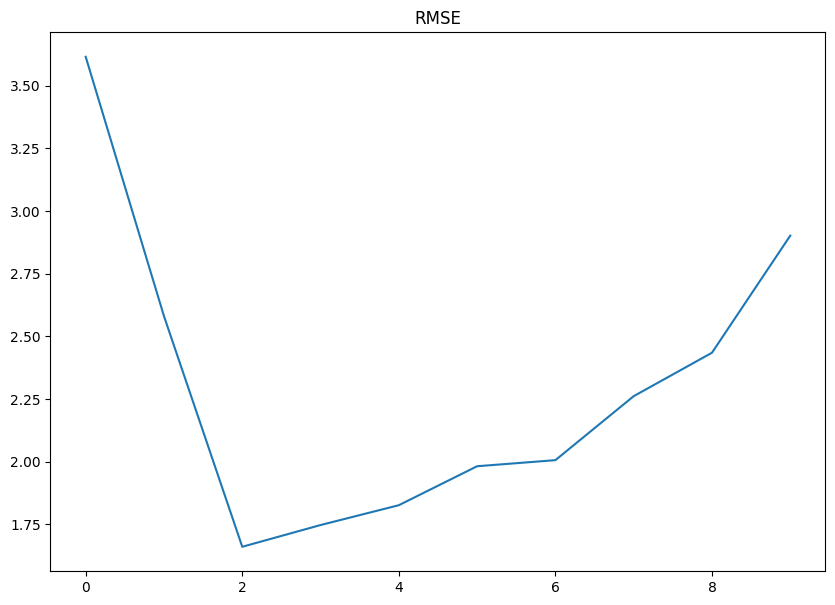

In [7]:
mod.setModel(mu = dataTr['muB'], sigmas = np.log(np.load("../fits/sinmod/sigmas.npy")),useCov = True)
res = np.zeros(10)
start = dataTe['data']['tidx'].min()
tidx = dataTe['data']['tidx'].values
data = dataTe['data']['data'].values
sds = dataTe['data']['var'].values
tau = (1/sds.mean())
idx = dataTe['data']['idx'].values

res[0] = np.sqrt(np.mean((mod.grid.getS(idxs = idx)@mod.mu - data)**2))
for k in range(9):
    rm = tidx == (start+k)
    idxs = idx[rm] + mod.grid.N*mod.grid.M*(k)
    mod.update(y = data[rm], idx = idxs,tau = tau)
    rmF = np.stack([tidx == (start+t) for t in range(k+1,10)],axis= 1)
    idxsF = np.hstack([idx[rmF[:,t-k-1]] + mod.grid.N*mod.grid.M*(t) for t in range(k+1,10)])
    res[k+1] = np.sqrt(np.mean((mod.grid.getS(idxs = idxsF)@mod.mu - np.hstack([data[rmF[:,t-k-1]] for t in range(k+1,10)]))**2))

fig,ax = plt.subplots(figsize = (10,7))
ax.plot(np.arange(10,dtype = "int32"),res,'-')
ax.set_title('RMSE')
print(res.sum())
